**RANDOM FOREST**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/Chennai_1990_2022_Madras.csv')

data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')
data['prcp_lag1'] = data['prcp'].shift(1)
data['prcp_lag2'] = data['prcp'].shift(2)
data['prcp_rolling_mean'] = data['prcp'].rolling(window=7).mean()

In [ ]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day_of_year'] = data['time'].dt.dayofyear
data['day_of_week'] = data['time'].dt.dayofweek


In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data[['tavg', 'tmin', 'tmax', 'prcp_lag1', 'prcp_lag2', 'prcp_rolling_mean', 'month', 'day_of_year', 'day_of_week']]
y = data['prcp']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)


In [ ]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print("Random Forest - MAE:", rf_mae, "MSE:", rf_mse, "RMSE:", rf_rmse, "R^2:", rf_r2)

Random Forest - MAE: 2.66330921217203 MSE: 31.51045251239939 RMSE: 5.613417186741013 R^2: 0.5778488443375631


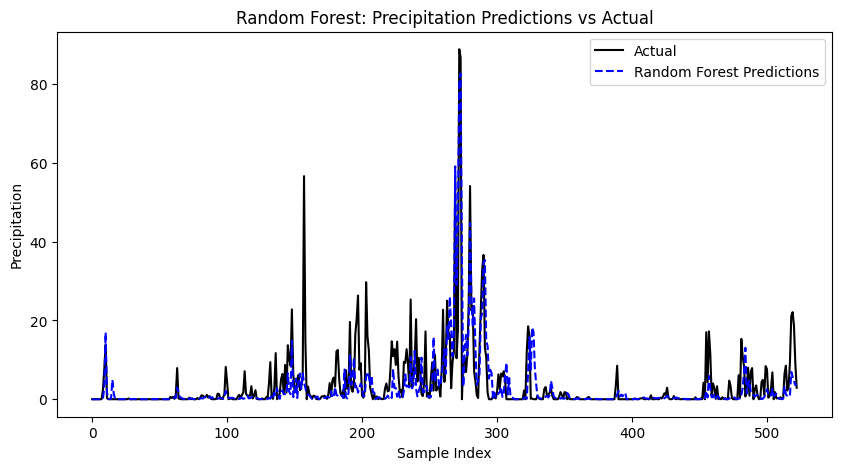

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(rf_pred, label='Random Forest Predictions', color='blue', linestyle='--')
plt.legend()
plt.title('Random Forest: Precipitation Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.show()

**LIGHTGBM**

In [ ]:
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 2091, number of used features: 9
[LightGBM] [Info] Start training from score 5.306456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000,
              random_state=42)

In [ ]:
lgb_pred = lgb_model.predict(X_test)

In [ ]:
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_mse = mean_squared_error(y_test, lgb_pred)
lgb_rmse = sqrt(lgb_mse)
lgb_r2 = r2_score(y_test, lgb_pred)

In [ ]:
print("LightGBM - MAE:", lgb_mae, "MSE:", lgb_mse, "RMSE:", lgb_rmse, "R^2:", lgb_r2)


LightGBM - MAE: 2.812448595096278 MSE: 31.554247538869536 RMSE: 5.6173167561451915 R^2: 0.5772621145522843


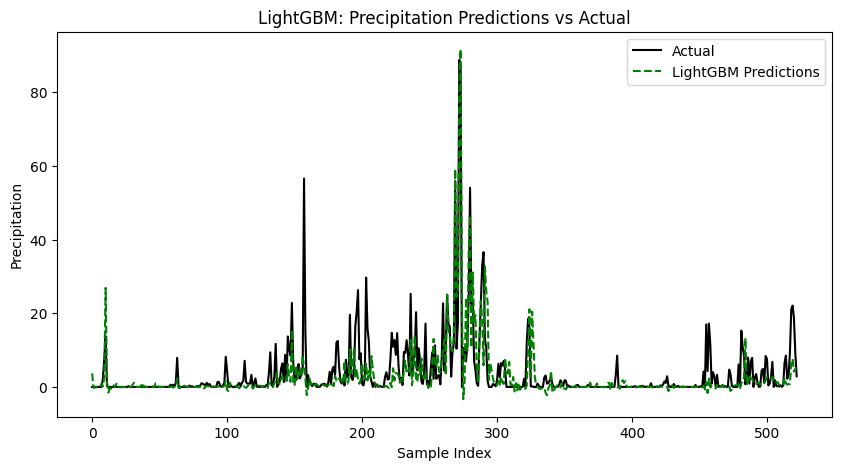

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(lgb_pred, label='LightGBM Predictions', color='green', linestyle='--')
plt.legend()
plt.title('LightGBM: Precipitation Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.show()